<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.718990,66.542591,43.816209,-59.450397,150.627394,181.005669,-30.378275
1,0.0,1.0,87.031548,84.849537,74.127118,45.704203,301.712407,237.915337,63.797070
2,0.0,2.0,33.293674,61.127192,33.005996,-28.404707,109.022155,115.161699,-6.139544
3,0.0,3.0,77.339573,76.753476,54.111186,35.992342,254.196579,191.488174,62.708404
4,0.0,4.0,79.648737,30.485313,41.026757,-4.961411,156.199396,165.242356,-9.042960
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.519862,31.769466,45.614017,0.628006,187.531351,172.458873,15.072479
29996,999.0,26.0,96.002755,60.042045,51.201956,-68.299110,148.947646,196.291594,-47.343949
29997,999.0,27.0,25.699232,74.382913,93.945660,5.472790,209.500595,190.740563,18.760032
29998,999.0,28.0,54.984191,95.107345,69.658271,90.504533,320.254340,207.562620,112.691720


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.718990,66.542591,43.816209,-59.450397,150.627394,181.005669,-30.378275
1,0.0,1.0,87.031548,84.849537,74.127118,45.704203,301.712407,237.915337,63.797070
2,0.0,2.0,33.293674,61.127192,33.005996,-28.404707,109.022155,115.161699,-6.139544
3,0.0,3.0,77.339573,76.753476,54.111186,35.992342,254.196579,191.488174,62.708404
4,0.0,4.0,79.648737,30.485313,41.026757,-4.961411,156.199396,165.242356,-9.042960
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.519862,31.769466,45.614017,0.628006,187.531351,172.458873,15.072479
29996,999.0,26.0,96.002755,60.042045,51.201956,-68.299110,148.947646,196.291594,-47.343949
29997,999.0,27.0,25.699232,74.382913,93.945660,5.472790,209.500595,190.740563,18.760032
29998,999.0,28.0,54.984191,95.107345,69.658271,90.504533,320.254340,207.562620,112.691720


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    89.718990  66.542591  ...  181.005669  -30.378275
      1.0    87.031548  84.849537  ...  237.915337   63.797070
      2.0    33.293674  61.127192  ...  115.161699   -6.139544
      3.0    77.339573  76.753476  ...  191.488174   62.708404
      4.0    79.648737  30.485313  ...  165.242356   -9.042960
...                ...        ...  ...         ...         ...
999.0 25.0   99.519862  31.769466  ...  172.458873   15.072479
      26.0   96.002755  60.042045  ...  196.291594  -47.343949
      27.0   25.699232  74.382913  ...  190.740563   18.760032
      28.0   54.984191  95.107345  ...  207.562620  112.691720
      29.0   24.509143  45.072354  ...  115.088786  -45.010341

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    89.718990  66.542591  ...  181.005669  -30.378275
      1.0    87.031548  84.849537  ...  237.915337   63.797070
      2.0    33.293674  61.127192  ...  115.161699   -6.139544
      3.0    77.339573  76.753476  ...  191.488174   62.708404
      4.0    79.648737  30.485313  ...  165.242356   -9.042960
...                ...        ...  ...         ...         ...
999.0 25.0   99.519862  31.769466  ...  172.458873   15.072479
      26.0   96.002755  60.042045  ...  196.291594  -47.343949
      27.0   25.699232  74.382913  ...  190.740563   18.760032
      28.0   54.984191  95.107345  ...  207.562620  112.691720
      29.0   24.509143  45.072354  ...  115.088786  -45.010341

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.718990,66.542591,43.816209,-59.450397,150.627394,181.005669,-30.378275
1,0.0,1.0,87.031548,84.849537,74.127118,45.704203,301.712407,237.915337,63.797070
2,0.0,2.0,33.293674,61.127192,33.005996,-28.404707,109.022155,115.161699,-6.139544
3,0.0,3.0,77.339573,76.753476,54.111186,35.992342,254.196579,191.488174,62.708404
4,0.0,4.0,79.648737,30.485313,41.026757,-4.961411,156.199396,165.242356,-9.042960
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.519862,31.769466,45.614017,0.628006,187.531351,172.458873,15.072479
29996,999.0,26.0,96.002755,60.042045,51.201956,-68.299110,148.947646,196.291594,-47.343949
29997,999.0,27.0,25.699232,74.382913,93.945660,5.472790,209.500595,190.740563,18.760032
29998,999.0,28.0,54.984191,95.107345,69.658271,90.504533,320.254340,207.562620,112.691720


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    89.718990  66.542591  ...  181.005669  -30.378275
      1.0    87.031548  84.849537  ...  237.915337   63.797070
      2.0    33.293674  61.127192  ...  115.161699   -6.139544
      3.0    77.339573  76.753476  ...  191.488174   62.708404
      4.0    79.648737  30.485313  ...  165.242356   -9.042960
...                ...        ...  ...         ...         ...
999.0 25.0   99.519862  31.769466  ...  172.458873   15.072479
      26.0   96.002755  60.042045  ...  196.291594  -47.343949
      27.0   25.699232  74.382913  ...  190.740563   18.760032
      28.0   54.984191  95.107345  ...  207.562620  112.691720
      29.0   24.509143  45.072354  ...  115.088786  -45.010341

[30000 rows x 7 columns]

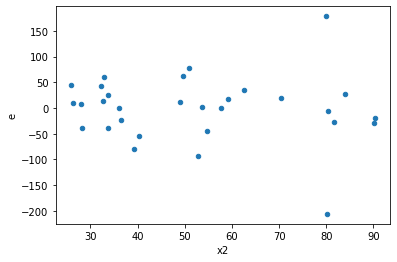

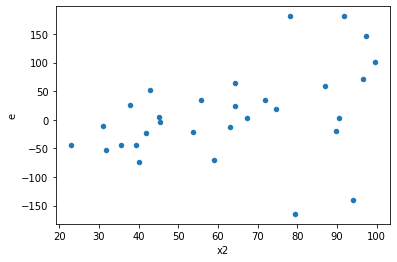

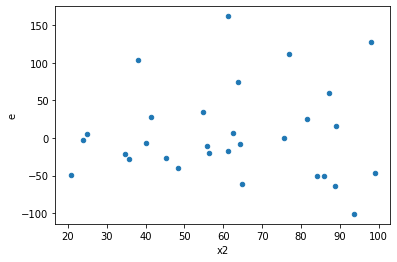

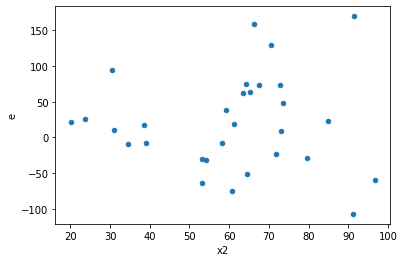

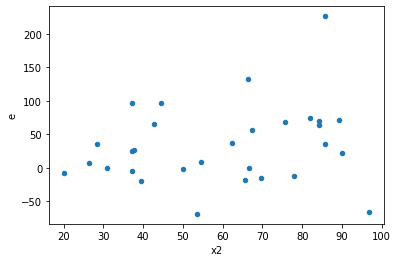

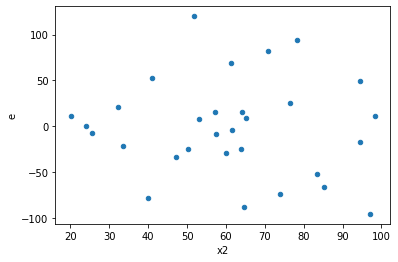

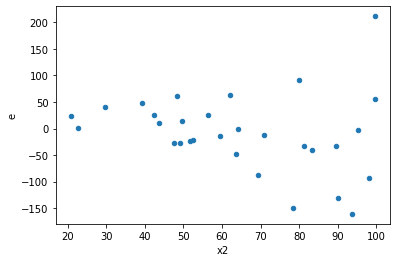

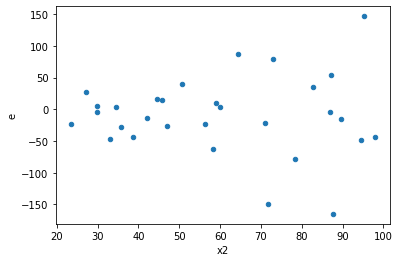

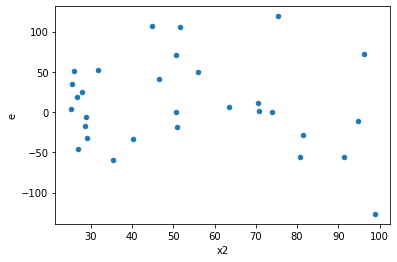

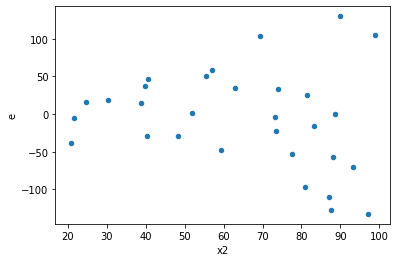

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,19677.856134470076,29852.885234087345,2186.428459385564,3316.9872482319274,1.5170801651402195,0.5445330093935625,0.7277334953032187,0.27226650469678126,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,9991.765178716218,38499.858467764956,1110.1961309684687,4277.762051973884,3.853158854230757,0.05715004943700275,0.9714249752814986,0.028575024718501374,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,13029.77355004665,69036.20345238656,1447.7526166718499,7670.689272487395,5.298342537360474,0.020676830421388903,0.9896615847893055,0.010338415210694452,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,6416.04392877928,32119.242238680494,712.8937698643645,3568.8046931867216,5.006082033604704,0.02497062468548683,0.9875146876572566,0.012485312342743415,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,34232.71677415499,52130.34229783977,3803.6351971283325,5792.26025531553,1.522822235867564,0.540917195791867,0.7295414021040665,0.2704585978959335,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,13603.716949124782,35817.923285156685,1511.5241054583091,3979.769253906298,2.6329512308370315,0.1654413544738762,0.9172793227630619,0.0827206772369381,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,10247.295768649597,82855.15759429605,1138.5884187388442,9206.12862158845,8.085563202711656,0.004641569839713755,0.9976792150801431,0.0023207849198568775,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,6979.293011615504,71219.44677399693,775.4770012906115,7913.271863777436,10.204392716492597,0.0019272991570453701,0.9990363504214773,0.0009636495785226851,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,6937.463782671159,70416.16153264014,770.8293091856843,7824.017948071127,10.150130326954663,0.0019672442892371134,0.9990163778553814,0.0009836221446185567,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,19677.856134470076,29852.885234087345,2186.428459385564,3316.9872482319274,1.5170801651402195,0.5445330093935625,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,9991.765178716218,38499.858467764956,1110.1961309684687,4277.762051973884,3.853158854230757,0.05715004943700275,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,13029.77355004665,69036.20345238656,1447.7526166718499,7670.689272487395,5.298342537360474,0.020676830421388903,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,6416.04392877928,32119.242238680494,712.8937698643645,3568.8046931867216,5.006082033604704,0.02497062468548683,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,34232.71677415499,52130.34229783977,3803.6351971283325,5792.26025531553,1.522822235867564,0.540917195791867,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,13603.716949124782,35817.923285156685,1511.5241054583091,3979.769253906298,2.6329512308370315,0.1654413544738762,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,10247.295768649597,82855.15759429605,1138.5884187388442,9206.12862158845,8.085563202711656,0.004641569839713755,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,6979.293011615504,71219.44677399693,775.4770012906115,7913.271863777436,10.204392716492597,0.0019272991570453701,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,6937.463782671159,70416.16153264014,770.8293091856843,7824.017948071127,10.150130326954663,0.0019672442892371134,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    613
Reject005=1 : Homoscedasticity      387
Name: Result_test, dtype: int64